In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import librosa
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 
import tensorflow as tf
from scipy.io import wavfile as wav
import warnings
warnings.filterwarnings('ignore')

In [4]:
dataset = pd.read_csv('../metadata_20_mfcc.csv')

X = dataset.iloc[:,].values[:,1:20]
y = dataset.iloc[:, 0].values

unique_class = dataset['class_name'].unique()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [5]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [13]:
cmap="Blues"
cmap="BuPu"
cmap="Greens"
cmap="YlGnBu"

<AxesSubplot:title={'center':'Confusion Matrix'}>

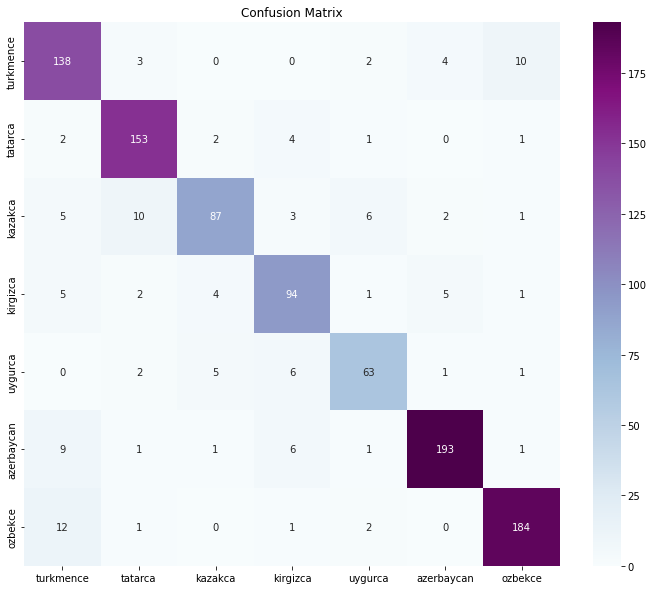

In [8]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(cm, index = [i for i in unique_class],
                  columns = [i for i in unique_class])
plt.figure(figsize = (12,10))
plt.title("Confusion Matrix")
sn.heatmap(df_cm, annot=True,fmt="d", cmap="BuPu")


In [21]:
from sklearn.metrics import classification_report
a = classification_report(y_test,y_pred,output_dict=True)
df_prf = pd.DataFrame(a).transpose()

<AxesSubplot:title={'center':'Classification result - Precision, Recall, f1-score'}>

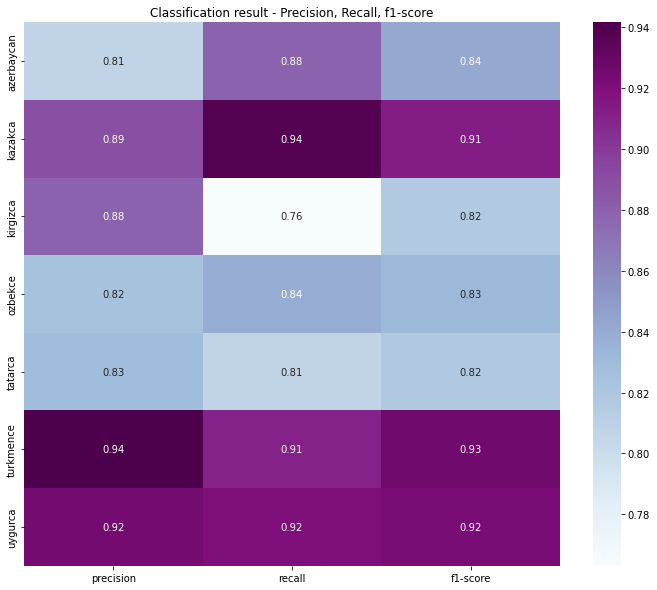

In [26]:
df_class_prf = pd.DataFrame(df_prf, index = ['azerbaycan','kazakca','kirgizca','ozbekce','tatarca','turkmence','uygurca'],
                  columns = ['precision','recall','f1-score'])
plt.figure(figsize = (12,10))
plt.title("Classification result - Precision, Recall, f1-score")
sn.heatmap(df_class_prf, annot=True,fmt=".2g", cmap="BuPu")

<AxesSubplot:title={'center':'Classification result - Accuracy, Macro AVG, Weighted AVG'}>

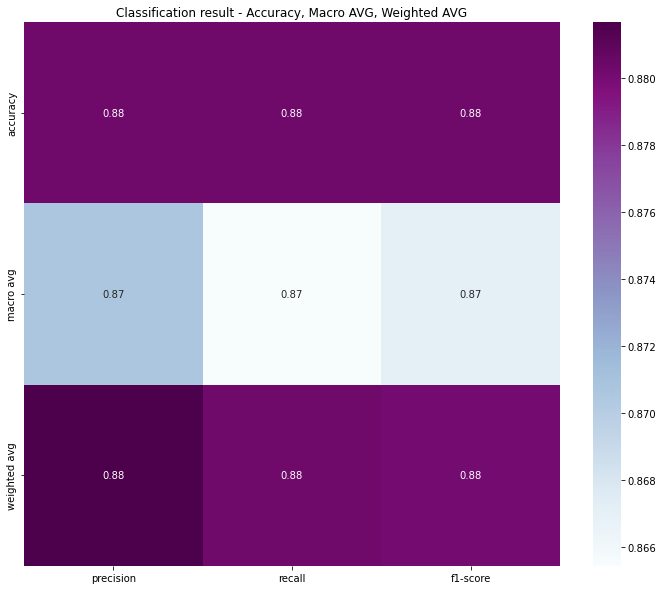

In [27]:
df_acc_avg = pd.DataFrame(df_prf, index = ['accuracy','macro avg','weighted avg'],
                  columns = ['precision','recall','f1-score'])
plt.figure(figsize = (12,10))
plt.title("Classification result - Accuracy, Macro AVG, Weighted AVG")
sn.heatmap(df_acc_avg, annot=True,fmt=".2g", cmap="BuPu")

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
yen = {
    'CNN': {'accuracy': 0.975868702,
          'loss': 0.094093271,
          'f1-score': 0.975105762,
          'precision': 0.979217887,
           'recall':0.971153855},
    'TL': {'accuracy': 0.854247093,
          'loss': 0.432136655,
          'f1-score': 0.827482641,
          'precision': 0.875534713,
           'recall':0.785782993},
    'NB': {'accuracy': 0.767745051,
          'loss': 0,
          'f1-score': 0.769305019,
          'precision': 0.757850861,
           'recall': 0.725660627},
    'SVM': {'accuracy': 0.880733945,
          'loss': 0,
          'f1-score': 0.867114732,
          'precision': 0.870705087,
           'recall': 0.865449211},
    'YSA': {'accuracy': 0.95412844,
          'loss': 0,
          'f1-score': 0.892991249,
          'precision': 0.893519782,
           'recall': 0.894080955}

}

In [27]:
df_prf = pd.DataFrame(yen).transpose()

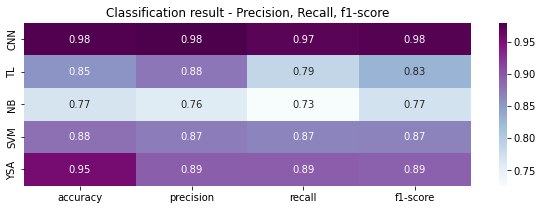

In [29]:
df_class_prf = pd.DataFrame(df_prf, index = ['CNN','TL','NB','SVM','YSA'],
                  columns = ['accuracy','precision','recall','f1-score'])
plt.figure(figsize = (10,3))
plt.title("Classification result - Precision, Recall, f1-score")
s_cls = sn.heatmap(df_class_prf, annot=True,fmt=".2g", cmap="BuPu")

figure = s_cls.get_figure()  
figure.savefig('karsilastirma.png', dpi=400)